<a href="https://colab.research.google.com/github/Josh-techie/AI-TPs/blob/master/Reviewing/Correction_Revision_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1> Correction : Applied data science</h1></center>
<center><h3>Génie Informatique</h3></center>


---



## **Exercice I**

Le fichier produit.csv contient un ensemble de données catégorielles pour déterminer si un utilisateur a acheté un produit particulier. la dépendance de l'achat du produit est en fonctions du sexe, l'âge, le salaire estimé d'une personne.

créer un modèle de régression qui prédit si un utilisateur va acheter le produit.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

dataset = pd.read_csv('produit.csv')
X = dataset.iloc[:, 1:4].values
y = dataset.iloc[:, 0].values
X[:,2] = LabelEncoder().fit_transform(X[:,2])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X[0])


regressor = LogisticRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(regressor.score(X_test, y_test)))
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df



[19 19000 1]
Accuracy of logistic regression classifier on test set: 0.91


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
75,0,0
76,0,1
77,0,0
78,1,1


## **Exercice II**

All_stocks_5yr est un ensemble de données historiques de la bourse (5 dernières années) pour toutes les sociétés actuellement présentes sur l'indice S&P 500.
1. Importer les bibliothèques nécessaires (pandas, numpy, seaborn, tensorflow)



In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime

2. Charger la dataset dans un dataframe pandas. Vous pouvez la télécharger de moodle.

In [ ]:
df= pd.read_csv('all_stocks_5yr.csv')

In [ ]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


3. Convertir la colonne 'date' en type de données DateTime.

In [ ]:
df['date']=pd.to_datetime(df['date'])



Analysons les données des actions Apple de 2014 à 2018.


4. créez un nouveau dataframe contenant uniquement les actions Apple de l'année 2013 à 2018.

In [ ]:
apple = df[df['Name'] == 'AAPL']
prediction_range = apple.loc[(apple['date'] > datetime(2013,1,1))
 & (apple['date']<datetime(2018,1,1))]

prediction_range.head()

,date,open,high,low,close,volume,Name
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


5. Traçez le graphique linéaire de l'evolution des actions en fonction du temps (utiliser la colonne "close").

<Axes: xlabel='date', ylabel='close'>

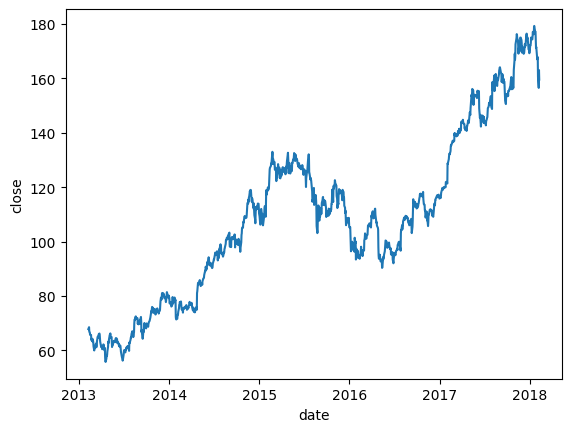

In [ ]:
sns.lineplot(x=apple['date'],y=apple['close'])

# **Exercice III**

L'API [Open Notify](http://open-notify.org/Open-Notify-API/People-In-Space/)
 renvoie le nombre actuel de personnes dans l'espace. Lorsqu'il est connu, il renvoie également les noms et les vaisseaux spatial
 sur lesquels se trouvent ces personnes. Cette API ne prend aucune entrée.


1. Collecter les informations (Nom, vaisseau spatial) des personnes dans l'espace

In [ ]:
import requests
import json
import pandas as pd

response = requests.get("http://api.open-notify.org/astros.json")
print(response.status_code)

names=[]
crafts=[]

for entry in response.json()["people"]:
  names.append(entry["name"])
  crafts.append(entry["craft"])



200


2. Stockez ces informations dans un Dataframe (pandas).

In [ ]:
data = {"names": names , "crafts":crafts}

df=pd.DataFrame(data)
df

,names,crafts
0,Sergey Prokopyev,ISS
1,Dmitry Petelin,ISS
2,Frank Rubio,ISS
3,Fei Junlong,Tiangong
4,Deng Qingming,Tiangong
5,Zhang Lu,Tiangong
6,Stephen Bowen,ISS
7,Warren Hoburg,ISS
8,Sultan Alneyadi,ISS
9,Andrey Fedyaev,ISS


3. Enregitrez les Dataframes dans un fichier csv.

In [ ]:
df.to_csv("space.csv")